# Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from os import listdir
from os.path import join
import matplotlib.pyplot as plt

In [2]:
index_dir = {
    '-': 0, 
    '(': 1, 
    ')': 2, 
    '+': 3, 
    '0': 4, 
    '=': 5, 
    '1': 6, 
    '2': 7, 
    '3': 8, 
    '4': 9, 
    '5': 10, 
    '6': 11, 
    '7': 12, 
    '8': 13, 
    '9': 14, 
    'div': 15, 
    'times': 16
}


In [3]:
def get_index(directory):
    return index_dir[directory]

# Function to load images and preprocess them
def load_images(folder, visualize_path=None):
    train_data = []
    
    # Visualize a specific image
    if visualize_path is not None:
        img = cv2.imread(visualize_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            original_img = img.copy()
            inverted_img = ~original_img
            _, thresh_img = cv2.threshold(inverted_img, 127, 255, cv2.THRESH_BINARY)

            ctrs, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0]) 
            m = 0
            
            # Cropping based on contours
            for c in cnt:
                x, y, w, h = cv2.boundingRect(c)
                m = max(w * h, m)
                if m == w * h:
                    x_max, y_max, w_max, h_max = x, y, w, h
            
            im_crop = thresh_img[y_max:y_max + h_max + 10, x_max:x_max + w_max + 10] 
            im_resize = cv2.resize(im_crop, (28, 28)) 
            im_resize = np.reshape(im_resize, (784, 1)) 
            train_data.append(im_resize)

            # Visualization of preprocessing steps
            plt.figure(figsize=(12, 8))
            plt.subplot(2, 3, 1)
            plt.title("Original Image")
            plt.imshow(original_img, cmap='gray')
            plt.axis('off')
            
            plt.subplot(2, 3, 2)
            plt.title("Inverted Image")
            plt.imshow(inverted_img, cmap='gray')
            plt.axis('off')
            
            plt.subplot(2, 3, 3)
            plt.title("Thresholded Image")
            plt.imshow(thresh_img, cmap='gray')
            plt.axis('off')
            
            plt.subplot(2, 3, 4)
            plt.title("Cropped Image")
            plt.imshow(im_crop, cmap='gray')
            plt.axis('off')

            plt.subplot(2, 3, 5)
            plt.title("Resized Image")
            plt.imshow(im_resize.reshape(28, 28), cmap='gray')
            plt.axis('off')

            plt.show()  # Display the images

    # Iterate through files in the folder
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
        
        if img is not None:
            original_img = img.copy()
            inverted_img = ~original_img
            _, thresh_img = cv2.threshold(inverted_img, 127, 255, cv2.THRESH_BINARY)

            ctrs, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0]) 
            m = 0
            
            for c in cnt:
                x, y, w, h = cv2.boundingRect(c)
                m = max(w * h, m)
                if m == w * h:
                    x_max, y_max, w_max, h_max = x, y, w, h
            
            im_crop = thresh_img[y_max:y_max + h_max + 10, x_max:x_max + w_max + 10] 
            im_resize = cv2.resize(im_crop, (28, 28)) 
            im_resize = np.reshape(im_resize, (784, 1)) 
            train_data.append(im_resize)

    return train_data

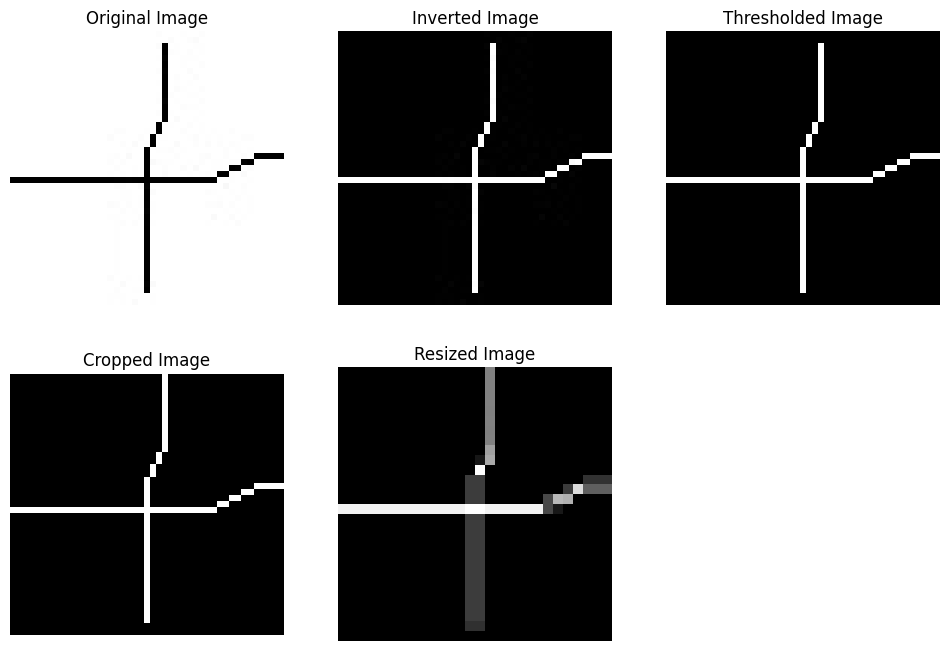

Importing...
(
)
+
-
0
1
2
3
4
5
6
7
8
9
=
div
times
Data import complete and saved to model/train_data.csv


In [5]:
dataset_dir = r"C:\Users\aruls\Desktop\Handwritten-Equation-Solver-main\extracted_images"
visualize_path = r"C:\Users\aruls\Desktop\Handwritten-Equation-Solver-main\extracted_images\+\11.jpg"

# First visualize the specified image
load_images(dataset_dir, visualize_path)

# Now import all images
directory_list = os.listdir(dataset_dir)
first = True
data = []

print('Importing...')
for directory in directory_list:
    print(directory)
    
    # Load the first directory's images
    if first:
        first = False
        data = load_images(os.path.join(dataset_dir, directory))
        for i in range(len(data)):
            data[i] = np.append(data[i], [str(get_index(directory))])
        continue

    # Load images from subsequent directories and append to the data
    auxillary_data = load_images(os.path.join(dataset_dir, directory))
    for i in range(len(auxillary_data)):
        auxillary_data[i] = np.append(auxillary_data[i], [str(get_index(directory))])
    
    data = np.concatenate((data, auxillary_data))

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('model/train_data.csv', index=False)

print('Data import complete and saved to model/train_data.csv')